# Kirkwood-Buff Analysis for Binary System

In [1]:
from kbkit.core import KBPipeline

## Create and run KBPipeline

In [2]:
pipe = KBPipeline(
    # path to directory containing systems
    base_path="./test_data/systems",
    # path to pure component directory
    pure_path="./test_data/pure_components",
    # pure system
    pure_systems=["DMDBP_400", "NDODE_400"],
    # ensemble type: (npt, nvt)
    ensemble="npt",
    # how to integrate activity coefficient derivatives: (numerical, polynomial)
    gamma_integration_type="numerical",
    # level of reporting for logging.Logger
    verbose=False,
)

results = pipe.run()

In [3]:
# access results --> stored in ThermoProperty dataclass with attributes: name, value, units
results.ge

ThermoProperty(name='ge', value=array([       nan, 0.30896791, 0.55571183, 0.74268326, 0.87067111,
       0.93534217, 0.92901648, 0.84803948, 0.68133354, 0.40615599,
              nan]), units='kJ/mol')

In [4]:
# convert units --> convert a property (str) to desired units
pipe.convert_units("ge", "kcal/mol")

array([       nan, 0.0738451 , 0.13281831, 0.17750556, 0.20809539,
       0.22355214, 0.22204027, 0.2026863 , 0.16284263, 0.09707361,
              nan])

## Create Plotter object

In [5]:
from kbkit.viz.plotter import Plotter

# provide molecules mapped to desired name
molecule_map = {
    "DMDBP": "DBP",
    "NDODE": "Dodecane",
}

# which molecule to use for labels on x-axis?
x_mol = "DMDBP"


plotter = Plotter(pipeline=pipe, x_mol=x_mol, molecule_map=molecule_map)

#### Plot KBIs as a function of composition

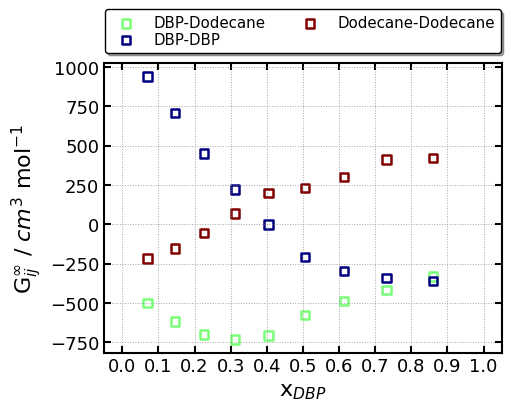

In [6]:
# figure for KBIs
plotter.plot("kbi")

#### Plot ln activity coefficients

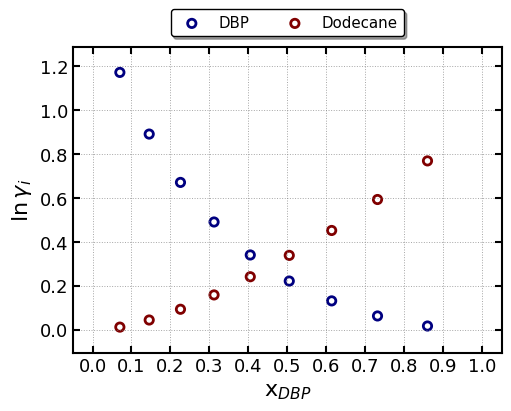

In [7]:
plotter.plot("lngammas")

#### Make all figures (stored in ./test_data/system/kb_analysis)

In [8]:
plotter.make_figures()